# Loan Application Status Prediction
***

##### Batch - DS0422

##### Submitted by - Akash Shrivastava

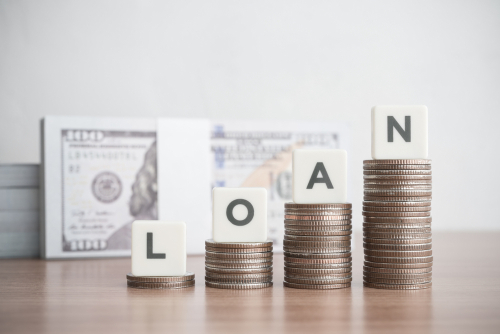

***

## Problem Statement:

**This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.**

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

**Downlaod Files:**
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv
***

In [1]:
# Importing required libraries
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df=pd.read_csv('loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 614
No. Of Columns - 13


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Integrity Check 

In [8]:
df.duplicated().sum()    #checks duplicate entries in dataset

0

##### Comment - Dataset does'nt contains any duplicated entries.

## Datatype Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Comment - 

- In Loan Application Status Prediction dataset there is 614 rows and 13 columns icluding target variable.
- 'Loan_status' is a our Target variable which is having object datatype,thus it is categorical variable.
-  Gender, Married, Education, Self_Employed ,Credit_History , Loan_Status are categorical features.
- There are 3 types of datatypes in this dataset i.e 4 float datatype, 1 int(64) datatype, 8 object datatype.

## Checking Missing Value 

<AxesSubplot:>

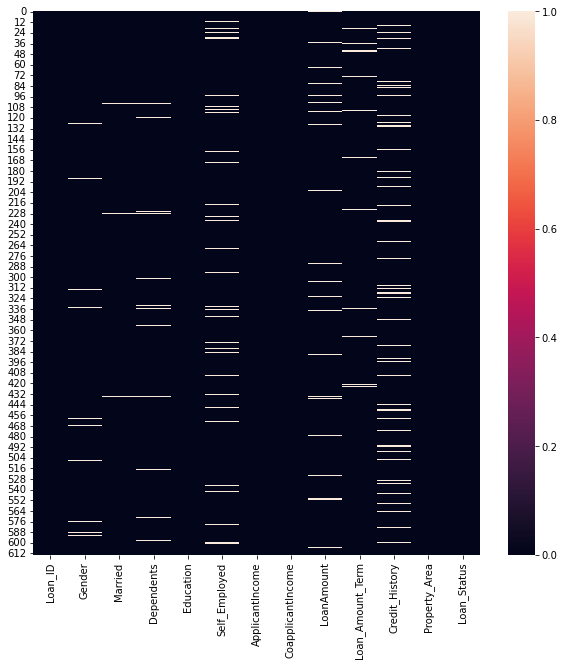

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [11]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


##### Comment - 

- 7 out of 13 columns contains missing value.
- We can use mean and mode to replace NaN values as small amount of data is missing . 

###### Let's explore categorical features before missing value imputation

In [12]:
features=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in features:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


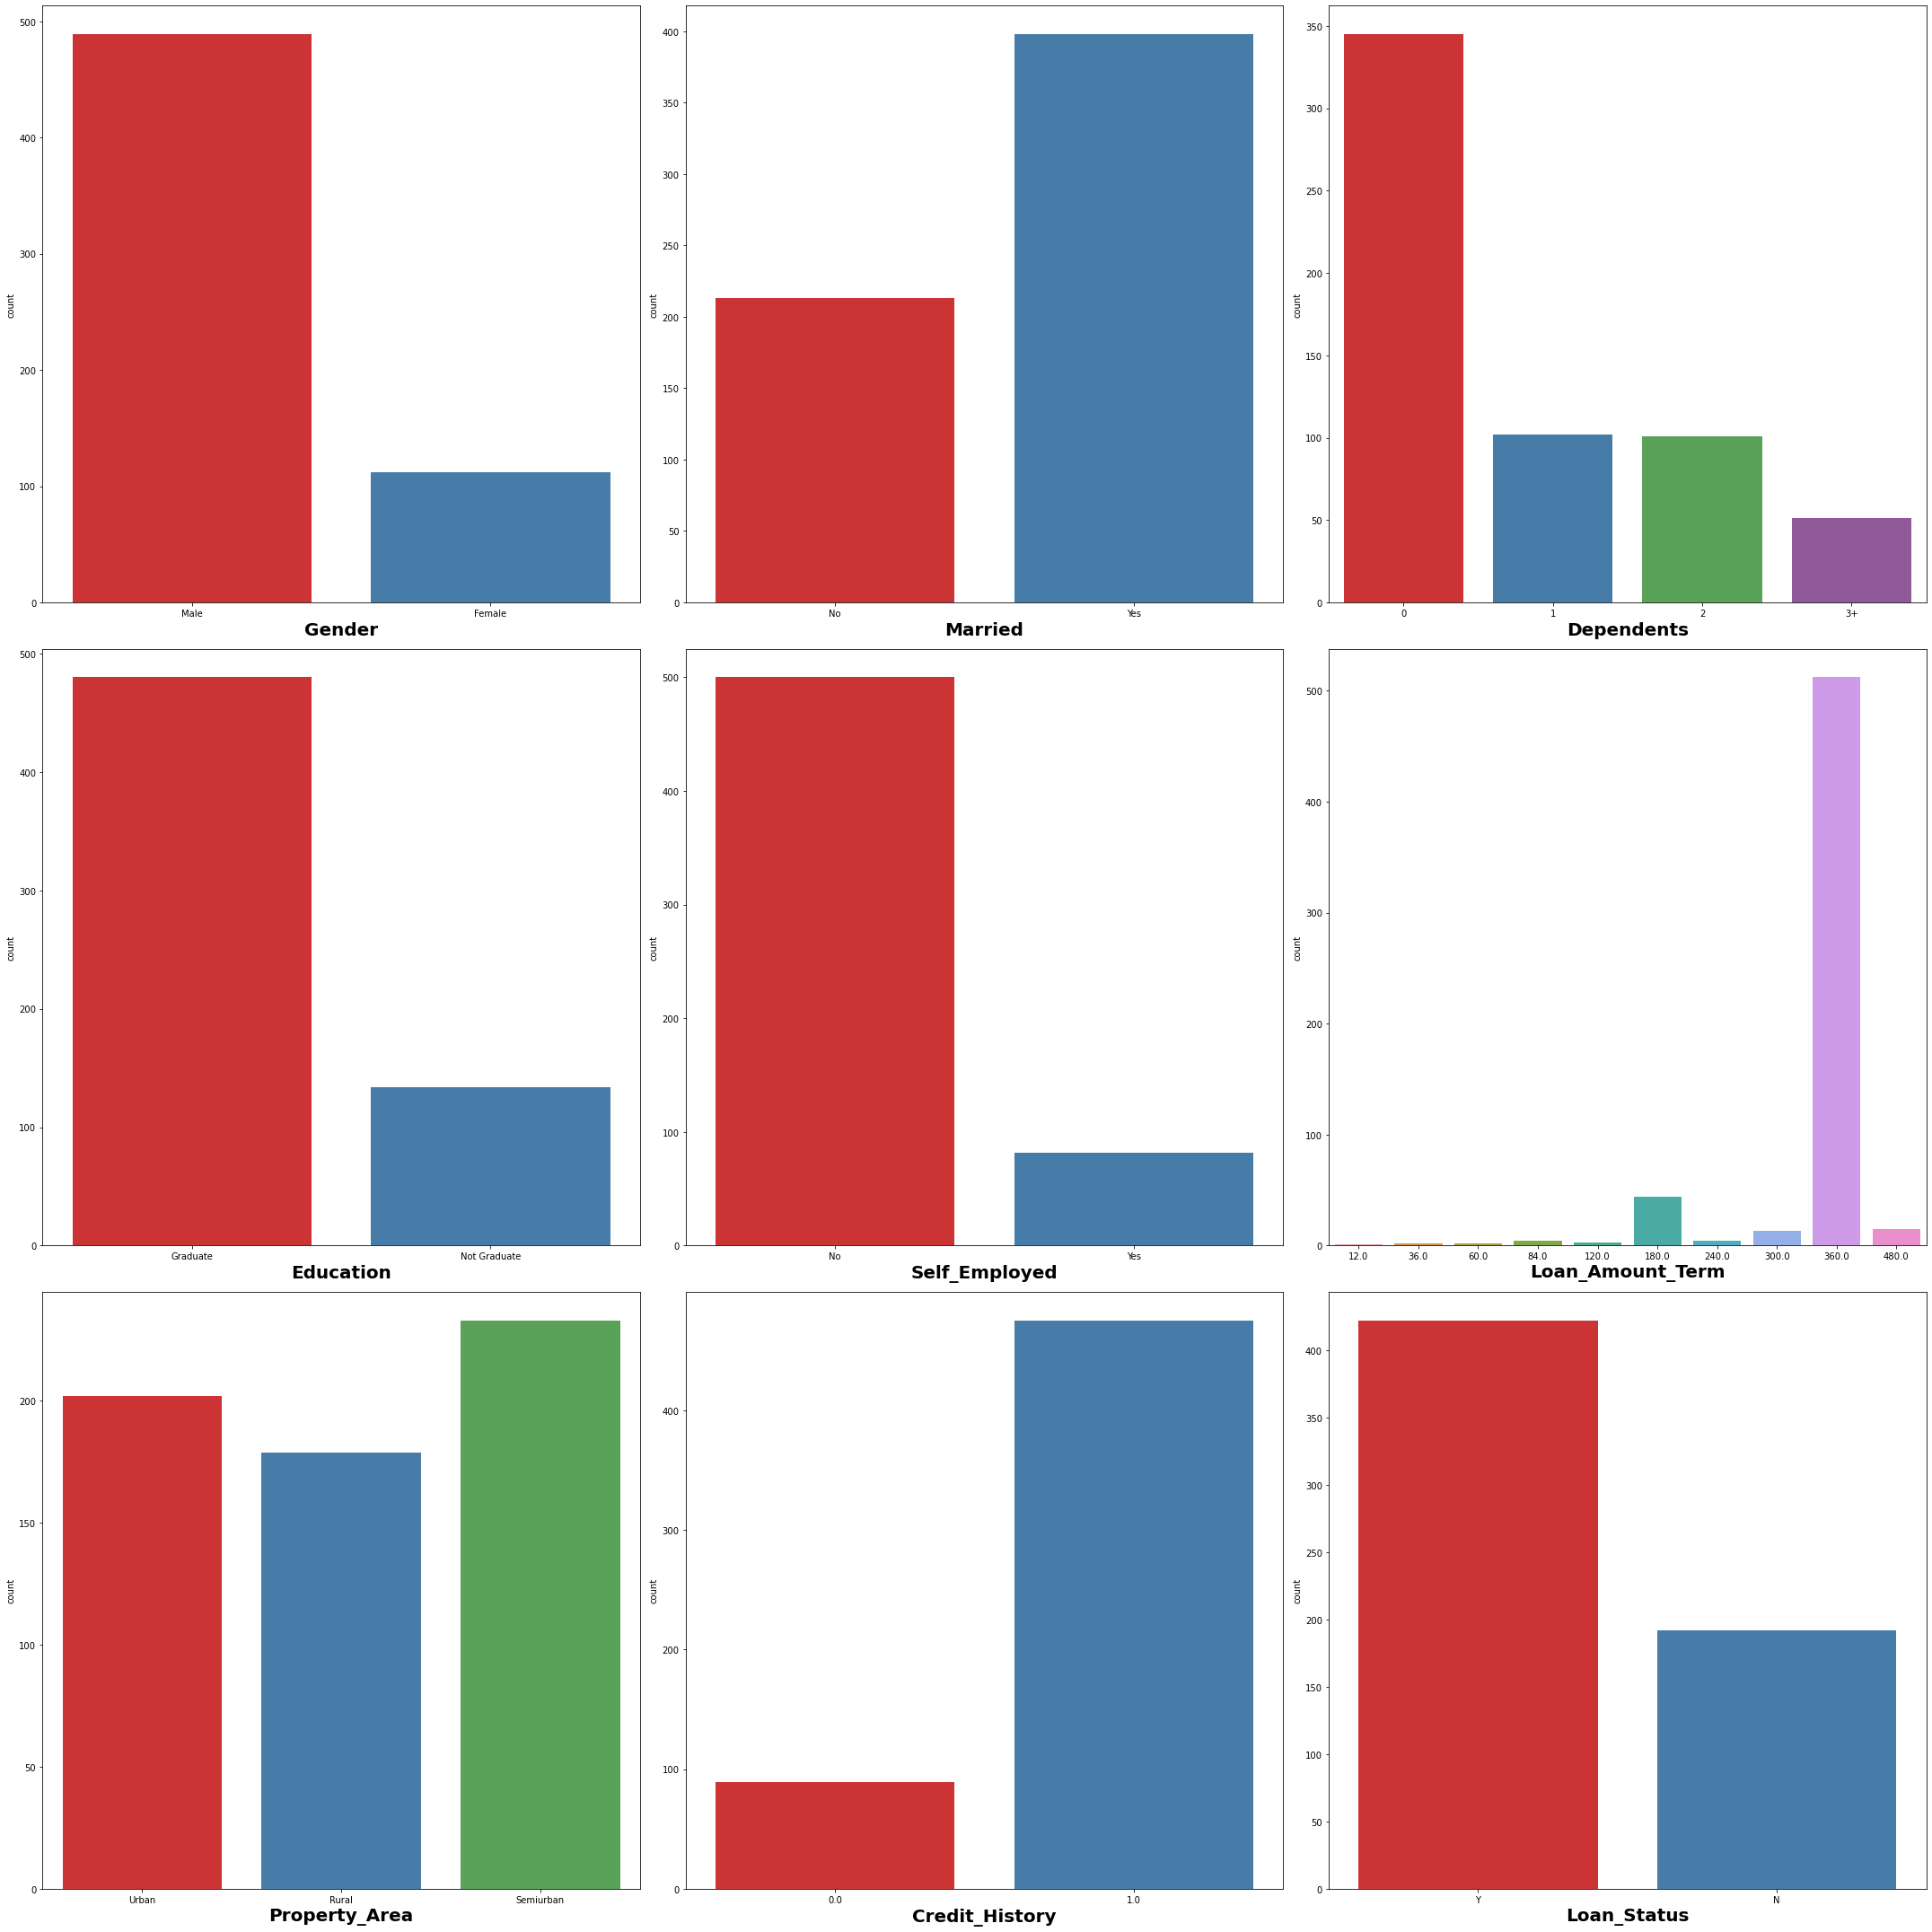

In [13]:
sns.set_palette('Set1')
plt.figure(figsize=(30,30), facecolor='white')
plotnumber =1
features=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in features :
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

##### Comment - 

- Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?
- Only 20% applicants are self employed. So it will be interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.
- Nearly 70% are married and 75% of loan applicants are graduates.
- Almost 60% of the applicants have no dependents.
- Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
- 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
- Nearly 70 % applicant gets loan approved.

###### We can impute categorical variable with mode in that category.For numerical variable we will using mean and median. If outliers are still present then we will impute with median

### Checking Outliers in Numerical Variable for any missing values by plotting boxplot 

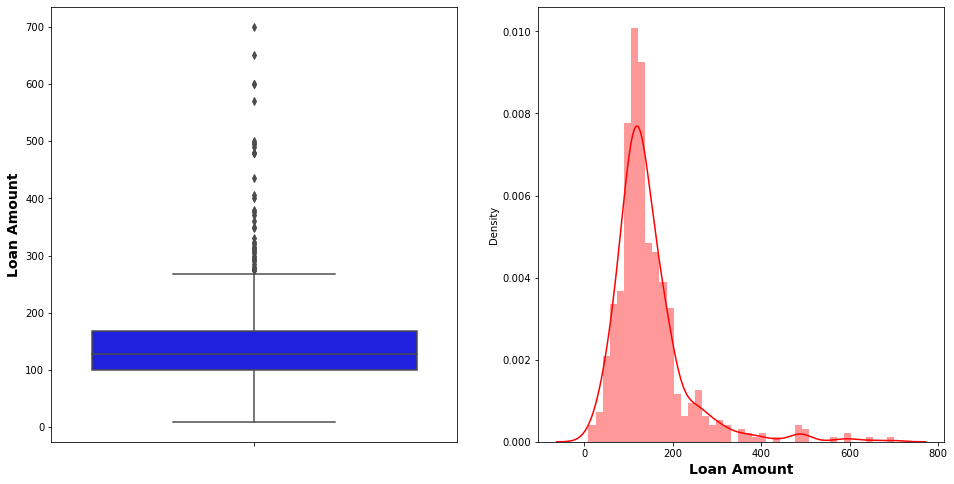

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(y='LoanAmount',data=df,color='b')
plt.ylabel('Loan Amount',fontsize=14,fontweight='bold')
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'],color='r')
plt.xlabel('Loan Amount',fontsize=14,fontweight='bold')
plt.tight_layout
plt.show()

In [15]:
print('Mean of Loan Amount -',df['LoanAmount'].mean())
print('Median of Loan Amount -',df['LoanAmount'].median())

Mean of Loan Amount - 146.41216216216216
Median of Loan Amount - 128.0


##### Comment - 

- The mean is greater than median loan amount.
- Clearly we can observe outliers in boxplot and feature is strecth to far in distribution plot.
- As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in loan amount with median.

## Imputation of Missing Values

**1. Missing values in Loan amount is impute with median value.**

**2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.**

**3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.**

In [16]:
#Imputating missing value with mode for categorical features 
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

#Imputation of Numerical Features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

### Checking Missing Values After Imputation

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


##### Comment - There is no missing values present.

### Statistical Matrix

<AxesSubplot:>

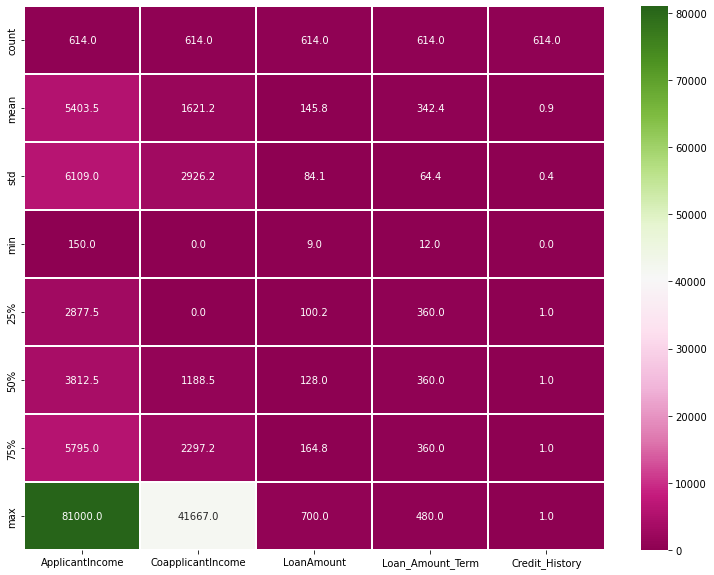

In [18]:
##visualization the statistics of columns using heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.describe(),linewidths = 0.1, fmt= '0.1f',annot = True,cmap='PiYG')

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##### Comment - 

- Maximum Income of applicant is 81000 and minimum income of applicant is 150.
- Maximum Loan Tenure is 480 months i.e approx 40 years and minimum loan tenure is for 12 months.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- In Applicant Income & coapplicant income Std. deviation value is greater than median.So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.

## Analyzing Target variable

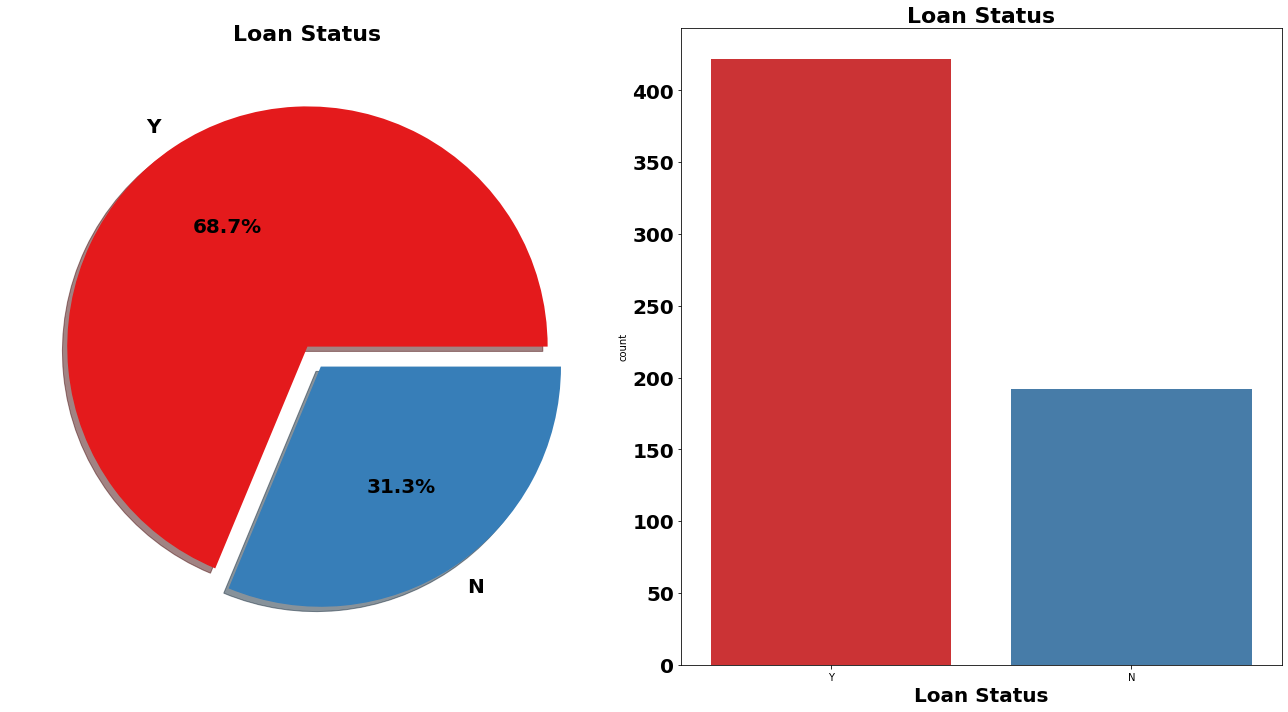

In [20]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Loan Status',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Loan Status',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

##### Comment - 

- We can observe that dataset is imbalanced in nature.
- 68.7% Applicants gets loan approval.

###### Let's check each  feature against Target variable to gain more insight.

### Gender VS Loan Status

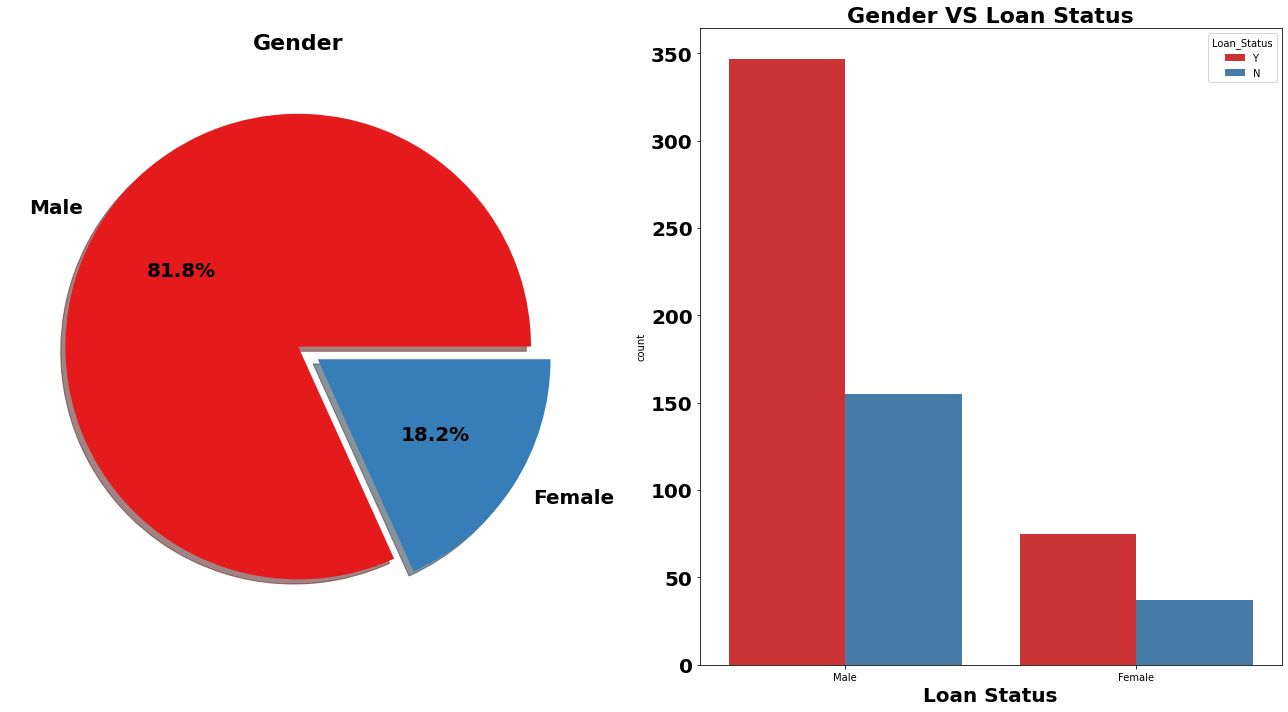

In [21]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue='Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Gender VS Loan Status',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Loan Status',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

In [22]:
pd.crosstab(df['Gender'],df['Loan_Status'],margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


##### Comment-  

- 81.8% applicants are male. 
- 65% applicant from each gender gets loan approval, that means gender does'nt plays an important role in loan approval.

### Married VS Loan_Status

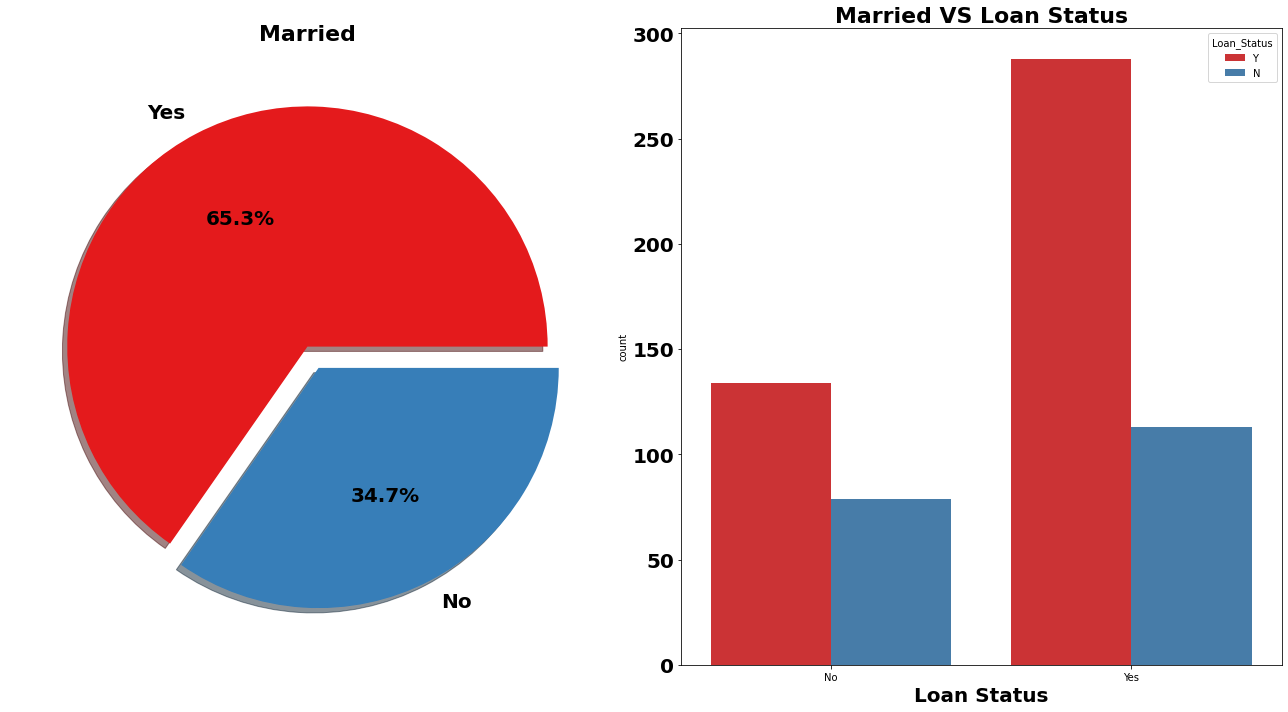

In [23]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Married',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue='Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Married VS Loan Status',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Loan Status',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

In [24]:
pd.crosstab([df['Gender'],df['Married']],df['Loan_Status'],margins=True).style.background_gradient(cmap='summer_r')

##### Comment - 

- 65.3% loan applicants are married, and we can observe from countplot that married couple are more likely to get loan approval.
- From the above crosstab we can have observed an interesting insight -
   - unmarried women have more chances of getting loan approval as compared to married women.We will try to gain more insight on which factor plays an important role in deciding loan approval,i.e educcation,employment or income.
   - married men have more chances of loan approval.

### Number of dependents VS Loan Status

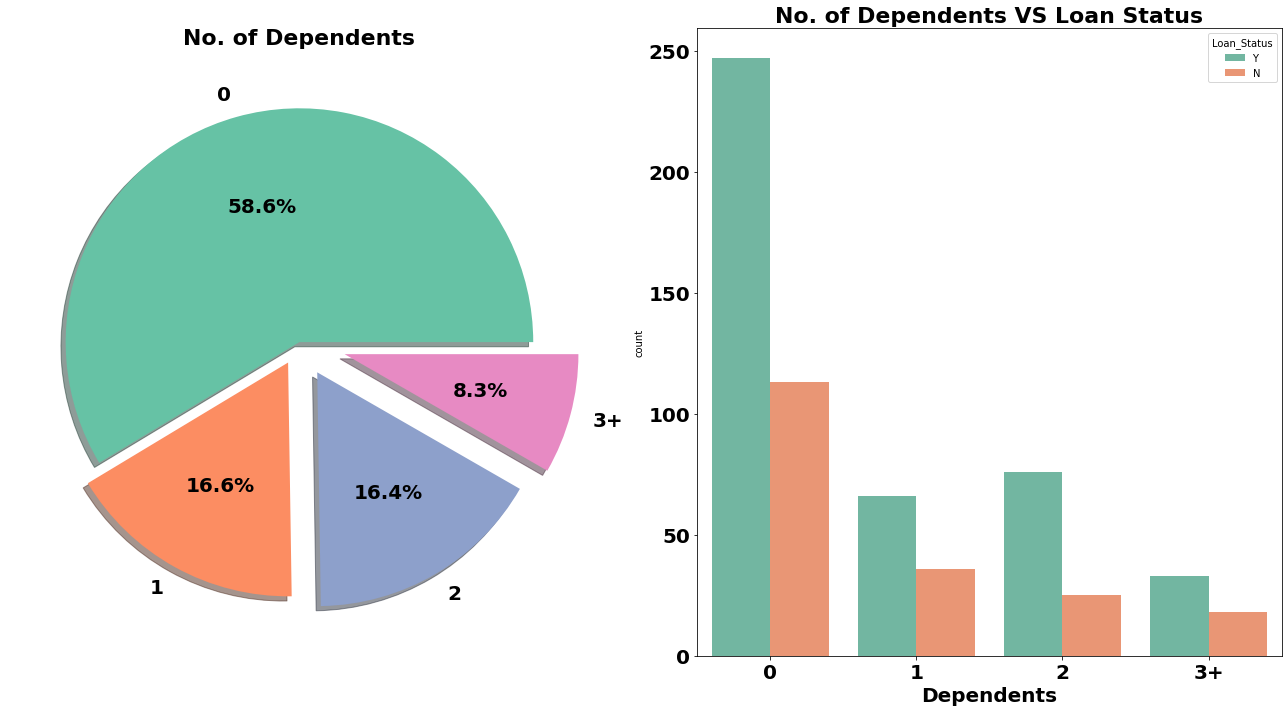

In [25]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue='Loan_Status',data=df,ax=ax[1])
ax[1].set_title('No. of Dependents VS Loan Status',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Dependents',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
pd.crosstab([df['Dependents']],[df['Loan_Status'],df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

##### Comment - 

- 33% applicants have either 1 or 2 dependents and 58.6% applicants have no dependents on them. It will be interesting to know with increase in number of dependents there is increase in loan requirements.
- Females with no dependents have more Chances to get loan approval compared to females with dependents.
- In case of male maximum loan approval comes with 0 dependents followed by 2 dependents .

### Education VS Loan Status

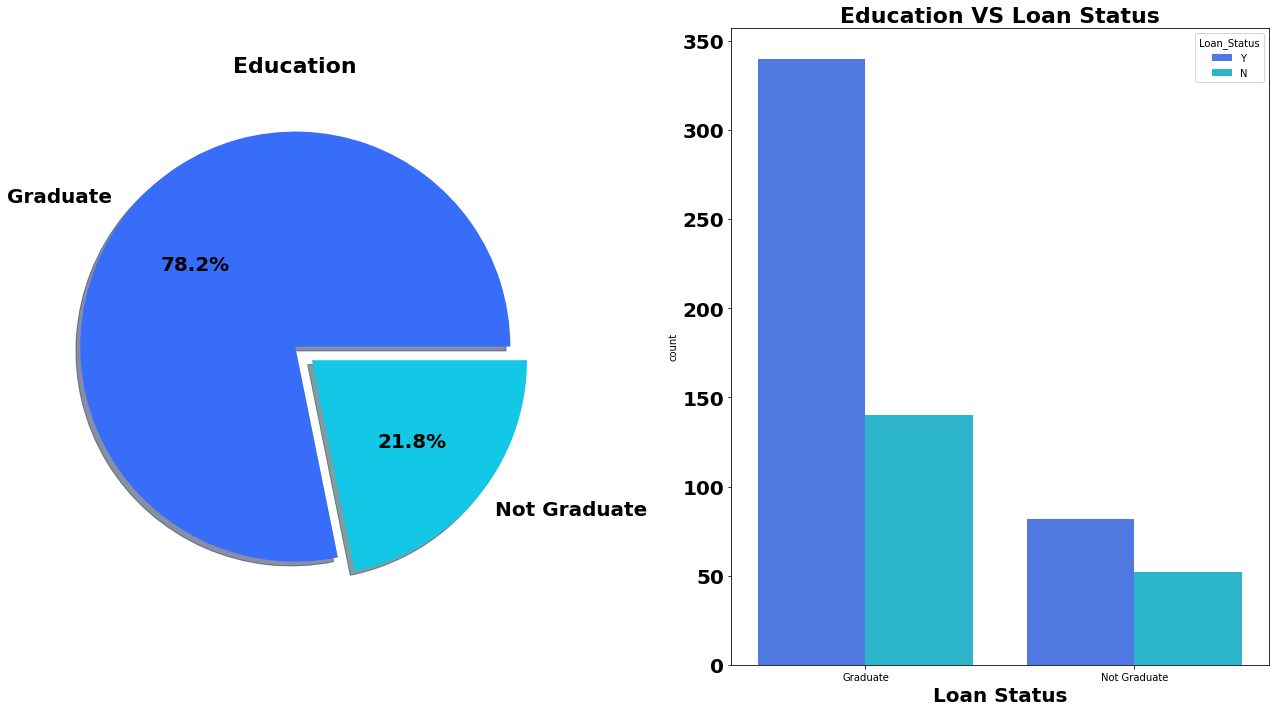

In [27]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Education',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue='Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Education VS Loan Status',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Loan Status',fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.show()

In [28]:
pd.crosstab([df['Education'],df['Gender']],df['Loan_Status'],margins=True).style.background_gradient(cmap='summer_r')

###### Comment - Graduates are more likely to get loan approvals.

## Encoding Categorical Data

In [29]:
features=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [30]:
#using Label Encoder on categorical Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in features:
    df[i]=le.fit_transform(df[i])

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Feature Selection and Engineering

### Outliers Detection and Removal

In [32]:
Numerical=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

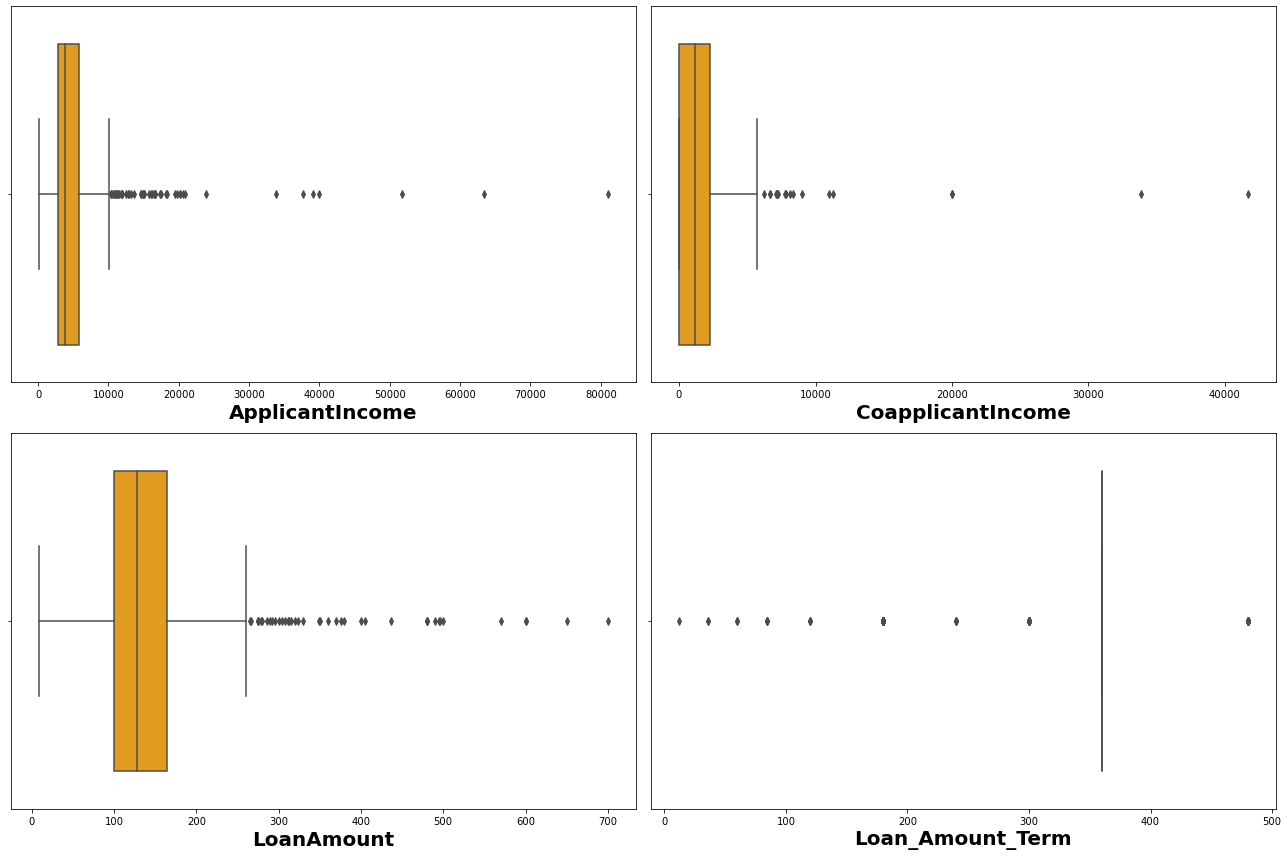

In [33]:
plt.figure(figsize=(18,12),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color='orange')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.tight_layout()    
plt.show()    

##### Comment - From above boxplot we can observe outliers exists in this dataset

In [34]:
#dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [35]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [36]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

### Outliers Removal by using Zscore Method

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print('Shape of the dataframe before removing outliers - ',df.shape)
print('Shape of the dataframe after removing outliers - ',df1.shape)
print('Percentage Data Loss - ',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()#copying changes to our original dataframe

Shape of the dataframe before removing outliers -  (614, 12)
Shape of the dataframe after removing outliers -  (577, 12)
Percentage Data Loss -  6.026058631921824


##### Data Loss

In [38]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


##### Comment - We can observe that we lost 6.02% approx data which is acceptable.

### Skewness Of Features

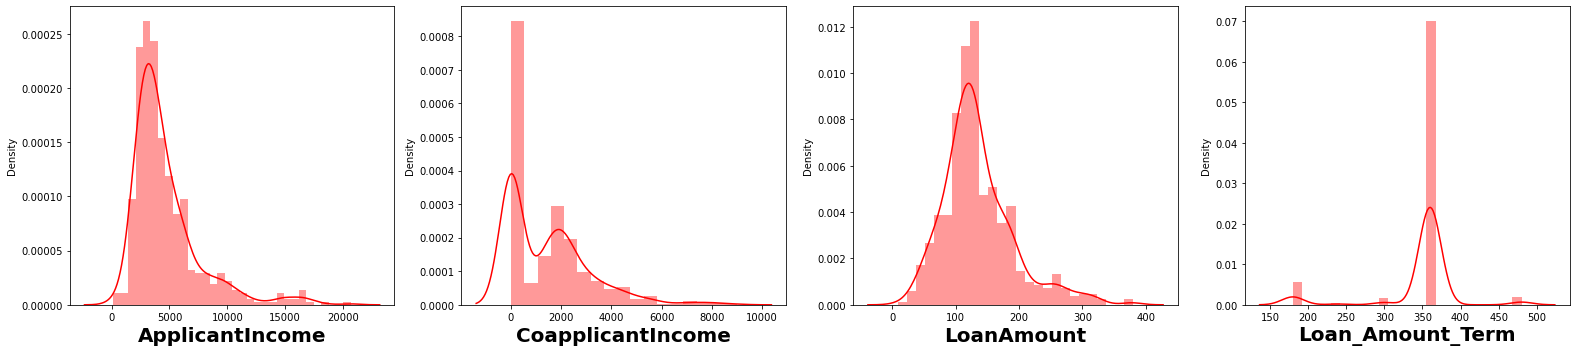

In [39]:
plt.figure(figsize=(22,5),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.show()  

In [40]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

##### Comment - 

- From above features i.e ApplicantIncome,CoapplicantIncome ,LoanAmount are skewed which is numerical feature.
- Other features having skewness are categorical feature , so we can ignore them.
- For further transformation we will be using Yeo-johnson transformation method.

In [41]:
# removing skewness using yeo-johnson method to get better prediction
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[skew]=scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


### Checking Skewness after using Yeo-johnson Transformation Method

In [43]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [44]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

##### Comment - Hence numerical features having skewness is now within permissible limit.
Now we go ahead with our further investigation.

In [45]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


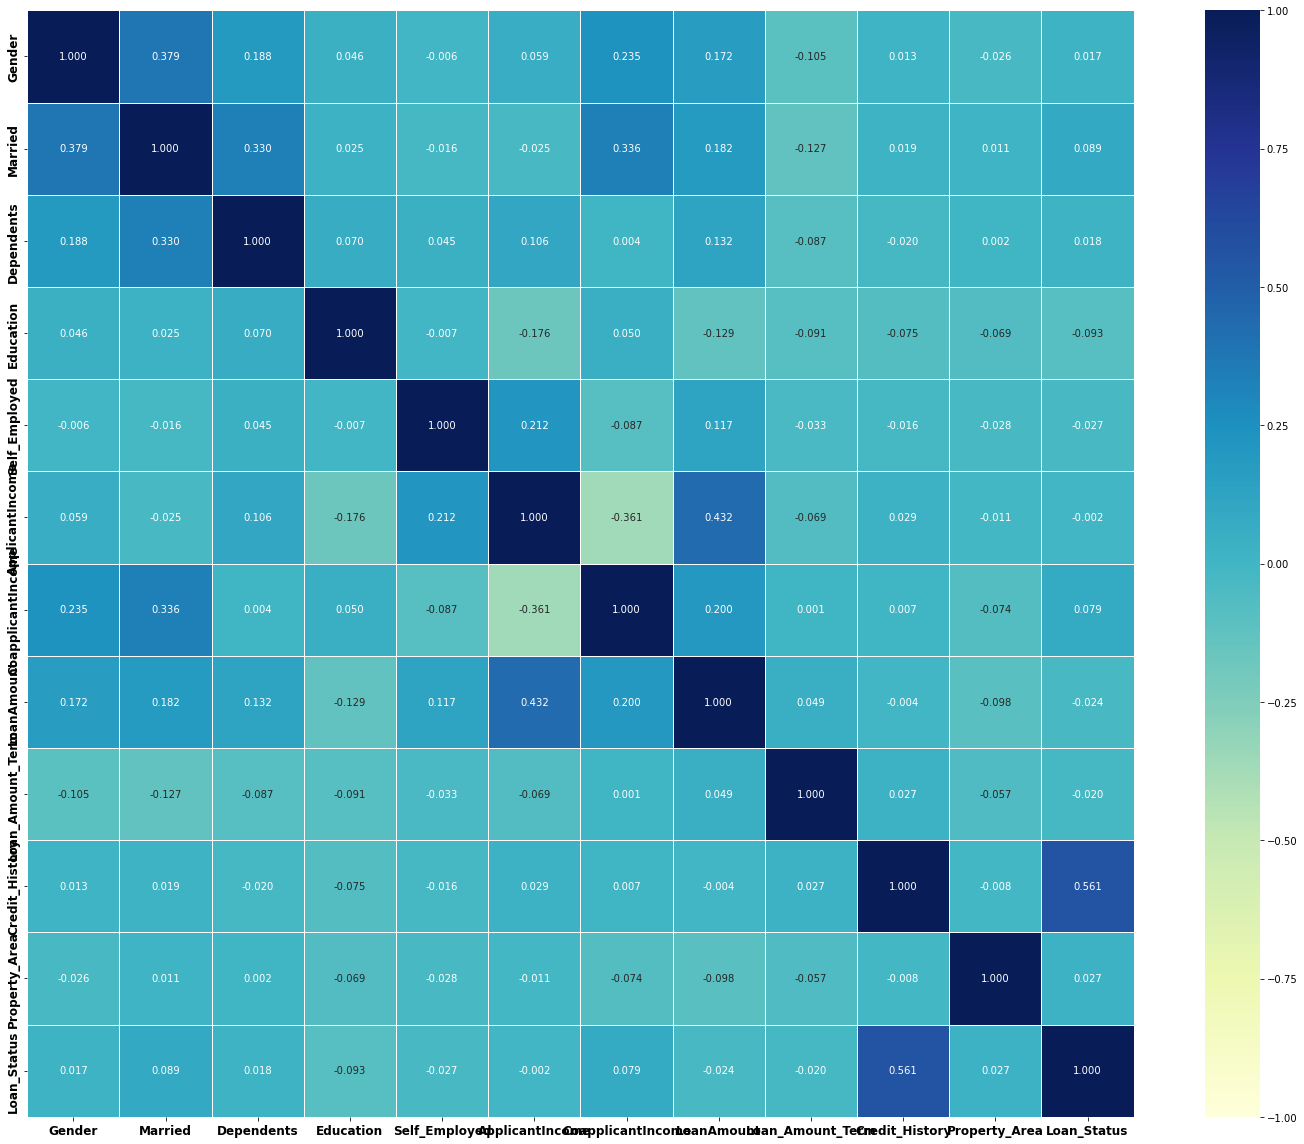

In [46]:
# plotting correlation
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True,square=True, fmt='0.3f',linewidths=1,linecolor='white',annot_kws={'size':10},cmap="YlGnBu")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.show()

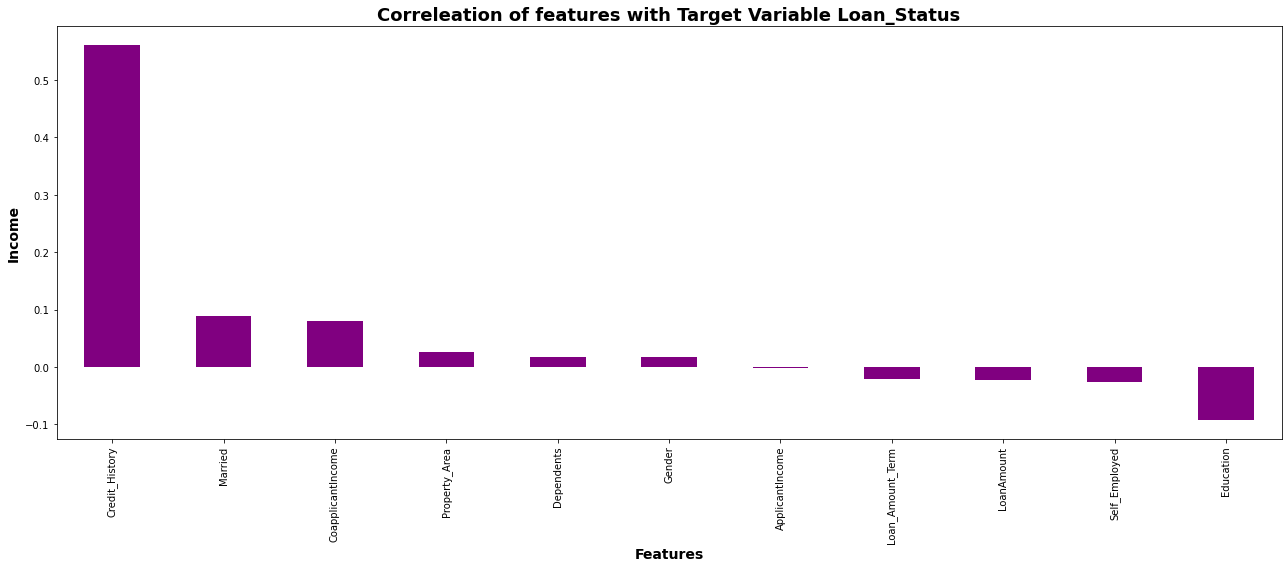

In [47]:
plt.figure(figsize=(18,8))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=14,fontweight='bold')
plt.ylabel('Income',fontsize=14,fontweight='bold')
plt.title('Correleation of features with Target Variable Loan_Status',fontsize=18,fontweight='bold')
plt.show()

##### Comment - Most of the features are poorly or moderately correlated with target variable except Credit History.

**Maximum correlation exists between Credit_History and Loan_Status i.e 0.561.**

### Checking Multicollinearity Between Features Using Variance_Inflation_Factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
vif['Features']=df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


##### Comment - All features VIF is within permissible limit of 10.

Now we need to work on Multicollinearity.

### Balancing Imbalanced Target Variable

In [49]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

##### Comment - Target variable is imbalanced in nature so we have to balance the target variable.

### Balancing Target Variable using SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
#Splitting data in target and dependent feature 
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

In [52]:
# oversampling using smote techniques 
oversample=SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [53]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

##### Comment - We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning & Model Building

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


## Finding Best Random State

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.3)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8242677824267782 on Random_state 29


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=177, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7656903765690377


Confusion matrix of Logistics Regression : 
 [[ 56  52]
 [  4 127]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.93      0.52      0.67       108
           1       0.71      0.97      0.82       131

    accuracy                           0.77       239
   macro avg       0.82      0.74      0.74       239
weighted avg       0.81      0.77      0.75       239



## Finding best n_neighbors for KNN Regressor

In [59]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4619406036915484
RMSE value for k=  2 is: 0.4363216348494043
RMSE value for k=  3 is: 0.4387124562248739
RMSE value for k=  4 is: 0.41857998640752103
RMSE value for k=  5 is: 0.40436944042727124
RMSE value for k=  6 is: 0.4022253301055537
RMSE value for k=  7 is: 0.4037438999032393
RMSE value for k=  8 is: 0.40273970226739103
RMSE value for k=  9 is: 0.4033154605402334
RMSE value for k=  10 is: 0.40312586155076435
RMSE value for k=  11 is: 0.4007755543789121
RMSE value for k=  12 is: 0.39819589664635824
RMSE value for k=  13 is: 0.3967509350947101
RMSE value for k=  14 is: 0.3998921808406587
RMSE value for k=  15 is: 0.40250263129678643
RMSE value for k=  16 is: 0.4030034015139316
RMSE value for k=  17 is: 0.40062640069766303
RMSE value for k=  18 is: 0.4016470043857313
RMSE value for k=  19 is: 0.4037257378767186
RMSE value for k=  20 is: 0.40480895850639137
RMSE value for k=  21 is: 0.4051045746606321
RMSE value for k=  22 is: 0.40564245381724723
RMSE value

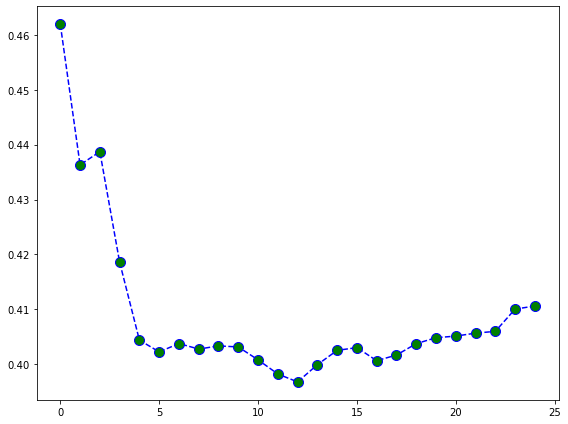

In [60]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

##### Comment - At k=7 we get the minimum rmse value which is approximately 0.39226576148338604,which further increases the k value.We can say that k=7 will give us the best result.

### Applying Other classification algorithm

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.803347280334728


Confusion matrix : 
 [[ 66  42]
 [  5 126]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.61      0.74       108
           1       0.75      0.96      0.84       131

    accuracy                           0.80       239
   macro avg       0.84      0.79      0.79       239
weighted avg       0.83      0.80      0.80       239





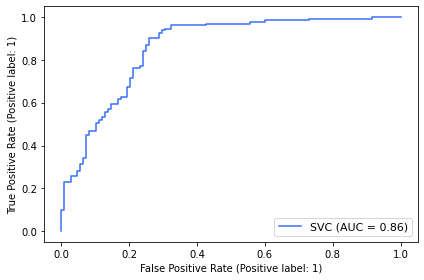

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7447698744769874


Confusion matrix : 
 [[ 49  59]
 [  2 129]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.45      0.62       108
           1       0.69      0.98      0.81       131

    accuracy                           0.74       239
   macro avg       0.82      0.72      0.71       239
weighted avg       0.81      0.74      0.72       239





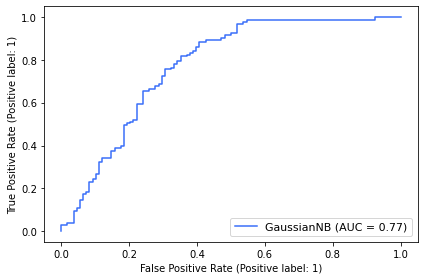

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7656903765690377


Confusion matrix : 
 [[ 79  29]
 [ 27 104]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       108
           1       0.78      0.79      0.79       131

    accuracy                           0.77       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.77      0.77      0.77       239





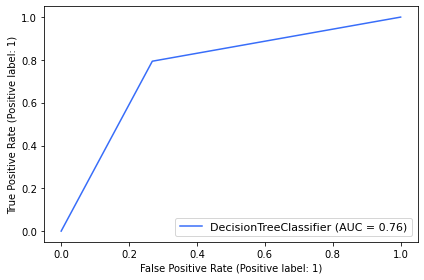

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7280334728033473


Confusion matrix : 
 [[78 30]
 [35 96]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       108
           1       0.76      0.73      0.75       131

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.73      0.73      0.73       239





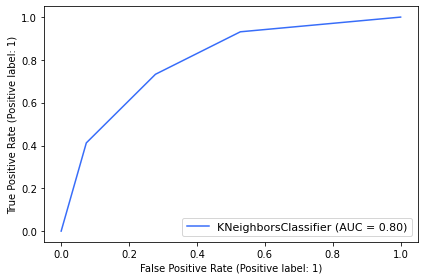

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8368200836820083


Confusion matrix : 
 [[ 83  25]
 [ 14 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       108
           1       0.82      0.89      0.86       131

    accuracy                           0.84       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239





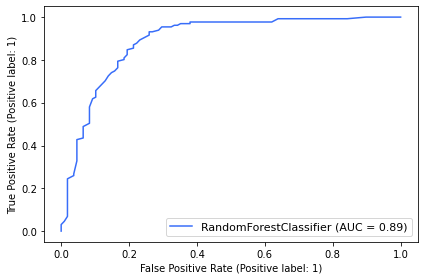

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8158995815899581


Confusion matrix : 
 [[ 85  23]
 [ 21 110]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       108
           1       0.83      0.84      0.83       131

    accuracy                           0.82       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.82      0.82      0.82       239





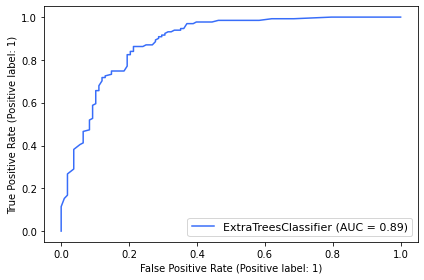

In [61]:
from sklearn.metrics import plot_roc_curve
model=[ SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp=plot_roc_curve(m,X_test,Y_test)
    plt.legend(prop={'size':11},loc='lower right')
    plt.show()
    print('============================================================================================================')

## CrossValidation

In [62]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m,X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.675      0.69811321 0.78616352 0.76100629 0.78616352]
Mean Score : 0.7412893081761006
Std deviation : 0.046205189154102884




Cross Validation Score SVC() :

Score : [0.6875     0.75471698 0.79245283 0.73584906 0.79245283]
Mean Score : 0.7525943396226416
Std deviation : 0.03924176780338318




Cross Validation Score GaussianNB() :

Score : [0.66875    0.71698113 0.79245283 0.74213836 0.77987421]
Mean Score : 0.7400393081761006
Std deviation : 0.04461445501779609




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69375    0.76100629 0.77358491 0.77987421 0.79874214]
Mean Score : 0.7613915094339623
Std deviation : 0.03594685229096668




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7125     0.74842767 0.74842767 0.72955975 0.78616352]
Mean Score : 0.7450157232704402
Std deviation : 0.02454621584186398




Cross Validation Score RandomForestClassifier() :

Score : [0.74375    0.81761006

##### Comment - We can observe that RandomForestClassifier() gives us Good accuracy score ,maximum f1 score along with best crossvalidation score.
Now we will apply Hyperparameter tuning on Random Forest Model and use it as a final model.

## Hyper Parameter Tuning : GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameter={'bootstrap':[True],'max_depth':[5,10,20,40,50,60],
          'max_features':['auto','log2'],
           'criterion':['gini','entropy'],
          'n_estimators':[5,10,15,25,50,60,70]
          }

In [65]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose = 10)

In [66]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.804 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.775 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.748 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [67]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 70}

## Final Model

In [74]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70,max_depth= 20,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test,y_pred))

Accuracy Score :
 0.8326359832635983


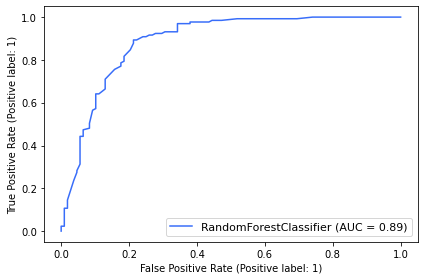

<Figure size 864x864 with 0 Axes>

Auc Score :
 0.8237560079163132


In [75]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)
plt.legend(prop={'size':11},loc='lower right')
plt.figure(figsize=(12,12))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(Y_test,Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Model

In [76]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']